# Plot(s) for a January Talk

Despite their intended short-term use, these will be a good starting point for paper figures.

## Experimental design

We suspect mutant (DEE/DEE) genes in mice are expressed in retinal angiogenesis.

Given a number of litters, $N$, we look at two(/three) animals per litter
- one mutant
- one wild type
- (one heterozygous)

** The experiment design demands a paired (dependent) t-test.**

## Image selection

Since hyaloid vessels were present in certain regions and would present as a nuisance parameter, vessels were imaged in sections. Images without hyaloid vessels were selected for analysis. 

## Measurables

We looked at the following parameters using AngioTool

- vessels percentage area (vessel density)
- total number of junctions (switching to junctions density)
- total vessels length
- total number of end points

### Load data

In [71]:
import numpy as np
import pandas as pd

unblinded_file = '../data/UnblindedAngioToolData.csv'
df = pd.read_csv(unblinded_file)

df.head()

,Vessels percentage area,Junctions density,Total Vessels Length,Total Number of End Points,Litter,AnimalID,Genotype
0,65.03,165.45,14.21,16,35,35-3,+/+
1,61.50,254.01,16.88,17,35,35-3,+/+
2,55.25,218.72,15.50,29,35,35-3,+/+
3,55.22,191.56,14.47,37,35,35-5,DEE/DEE
4,51.73,190.07,13.18,32,35,35-5,DEE/DEE


### Average over litter and genotype

In [72]:
data_mean = (df
             .set_index(['Litter', 'Genotype']) # pivot
             .sort_index(level = ['Litter', 'Genotype'])
             .mean(level = ['Litter', 'Genotype'])
            )

pd.options.display.float_format = '{:,.3f}'.format
data_mean

Vessels percentage area  Junctions density  \
Litter Genotype                                               
35     +/+                        60.593            212.725   
       DEE/DEE                    53.619            185.500   
36     +/+                        64.299            237.626   
       DEE/DEE                    62.152            190.816   
37     +/+                        58.682            152.771   
       DEE/+                      61.730            224.650   
       DEE/DEE                    54.292            137.070   
39     +/+                        56.755            226.433   
       DEE/+                      55.086            166.700   
       DEE/DEE                    50.380            165.405   
40     +/+                        55.956            245.782   
       DEE/+                      51.474            154.939   
       DEE/DEE                    51.083            161.894   
41     +/+                        49.744            150.792   
       DEE/DEE                    49.865            128.594   

                 Total Vessels Length  Total Number of End Points  
Litter Genotype                                                    
35     +/+                     15.531                      20.667  
       DEE/DEE                 13.567                      38.667  
36     +/+                     16.086                      26.333  
       DEE/DEE                 14.415                      31.167  
37     +/+                     13.102                      25.333  
       DEE/+                   15.673                      32.500  
       DEE/DEE                 12.666                      27.667  
39     +/+                     15.477                      52.200  
       DEE/+                   13.479                      36.500  
       DEE/DEE                 12.999                      45.800  
40     +/+                     16.085                      46.833  
       DEE/+                   12.848                      32.250  
       DEE/DEE                 13.234                      34.200  
41     +/+                     11.684                      39.800  
       DEE/DEE                 11.324                      40.667

In [73]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')
hetero = data_mean.xs('DEE/+',   level = 'Genotype')

data_mean = data_mean.reset_index(0).reset_index()

In [74]:
hetero

,Vessels percentage area,Junctions density,Total Vessels Length,Total Number of End Points
Litter,,,,
37,61.730,224.650,15.673,32.500
39,55.086,166.700,13.479,36.500
40,51.474,154.939,12.848,32.250


In [93]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

sns.set(style="white", color_codes=True)
sns.set_context("talk")

### Difference between wild and mutant

i.e. a positive value here means the mutant was deficient


In [94]:
pd.options.display.float_format = '{:,.2f}'.format

diff = wild - mutant
diff

,Vessels percentage area,Junctions density,Total Vessels Length,Total Number of End Points
Litter,,,,
35,6.97,27.23,1.96,-18.00
36,2.15,46.81,1.67,-4.83
37,4.39,15.70,0.44,-2.33
39,6.37,61.03,2.48,6.40
40,4.87,83.89,2.85,12.63
41,-0.12,22.20,0.36,-0.87


In [95]:
def get_normalized_values(experiment_df, control_df):
    norm_df = ((experiment_df / control_df.values * 100)
               .rename(
                   columns={
                       'Vessels percentage area':'Vessels Density',
                       'Junctions density':'Junctions Density',
                       'Total Vessels Length':'Vessels Length'}
               )
              )
    desired_columns = ['Vessels Density', 'Junctions Density', 'Vessels Length']

    norm_df = norm_df[desired_columns]
    
    return norm_df

In [96]:
wild

,Vessels percentage area,Junctions density,Total Vessels Length,Total Number of End Points
Litter,,,,
35,60.59,212.72,15.53,20.67
36,64.30,237.63,16.09,26.33
37,58.68,152.77,13.10,25.33
39,56.75,226.43,15.48,52.20
40,55.96,245.78,16.09,46.83
41,49.74,150.79,11.68,39.80


In [97]:
hetero

,Vessels percentage area,Junctions density,Total Vessels Length,Total Number of End Points
Litter,,,,
37,61.73,224.65,15.67,32.50
39,55.09,166.70,13.48,36.50
40,51.47,154.94,12.85,32.25


In [100]:
norm_mutant_at_df = get_normalized_values(mutant, wild)
norm_mutant_at_df

,Vessels Density,Junctions Density,Vessels Length
Litter,,,
35,88.49,87.20,87.36
36,96.66,80.30,89.62
37,92.52,89.72,96.67
39,88.77,73.05,83.99
40,91.29,65.87,82.27
41,100.24,85.28,96.92


In [102]:
het_and_wild_litters = list(set(hetero.index.values) & set(wild.index.values))

norm_hetero_at_df = get_normalized_values(hetero, wild.loc[het_and_wild_litters])
norm_hetero_at_df

,Vessels Density,Junctions Density,Vessels Length
Litter,,,
37,110.32,91.40,97.44
39,93.87,109.12,102.87
40,90.70,68.43,83.01


### Ratio between mutant and wild

## Merge with outgrowth data

In [53]:
data = pd.read_csv("../data/UnblindedOutgrowthData.csv",
                   usecols=['Genotype', 'ID', 'Mean']
                  )


# We want to group by litter, so we need to add a litter column
data['Litter'] = [x[:2] for x in data['ID']]


data.replace(to_replace=['DD','DP','PP'],
             value=['DEE/DEE', 'DEE/+','+/+'],
             inplace=True)

data_mean = (data
             .set_index(['Litter','Genotype'])
             .sort_index(level=['Litter','Genotype'])
             .mean(level=['Litter', 'Genotype'])
            )

wild =   data_mean.xs('+/+',     level = 'Genotype')
hetero = data_mean.xs('DEE/+',   level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

## Not very idiomatic to Pandas, but it works fine for now
het_and_wild_litters = list(set(hetero.index.values) & set(wild.index.values))
mut_and_wild_litters = list(set(mutant.index.values) & set(wild.index.values))

norm_mutant_outgrowth_df = (mutant.loc[mut_and_wild_litters]/wild.loc[mut_and_wild_litters]*100)

norm_mutant_outgrowth_df.rename(index=str,
                                columns={'Mean':'Outgrowth Length'},
                                inplace=True
                               )

norm_hetero_outgrowth_df = (hetero.loc[het_and_wild_litters]/wild.loc[het_and_wild_litters]*100)

norm_hetero_outgrowth_df.rename(index=str,
                                columns={'Mean':'Outgrowth Length'},
                                inplace=True
                               )


In [54]:
mutant_frames = [norm_mutant_at_df, norm_mutant_outgrowth_df]
mutant_df = pd.concat(mutant_frames)
mutant_df

,Junctions Density,Outgrowth Length,Vessels Density,Vessels Length
Litter,,,,
35,87.20,nan,88.49,87.36
36,80.30,nan,96.66,89.62
37,89.72,nan,92.52,96.67
39,73.05,nan,88.77,83.99
40,65.87,nan,91.29,82.27
41,85.28,nan,100.24,96.92
20,nan,115.57,nan,nan
28,nan,87.91,nan,nan
31,nan,105.00,nan,nan


In [103]:
hetero_frames = [norm_hetero_at_df, norm_hetero_outgrowth_df]
hetero_df = pd.concat(hetero_frames)
hetero_df

,Junctions Density,Outgrowth Length,Vessels Density,Vessels Length
Litter,,,,
37,91.40,nan,110.32,97.44
39,109.12,nan,93.87,102.87
40,68.43,nan,90.70,83.01
20,nan,126.88,nan,nan
28,nan,103.55,nan,nan
16,nan,106.84,nan,nan
36,nan,70.29,nan,nan
35,nan,92.89,nan,nan


## Plot

In [138]:
def make_bar_and_strip_plot(df, title='', ylim=[60,110]):
    sns.set_style("white")

    bar_palette = sns.cubehelix_palette(4,
                                        start = 0.5,
                                        rot =  0.9,
                                        dark = 0.75,
                                        light = 0.9)

    plot_order = ['Outgrowth Length', 'Vessels Density',
                  'Vessels Length', 'Junctions Density']

    with sns.plotting_context("notebook", font_scale = 1.5):
        fig, ax = plt.subplots(figsize = (10, 10))

        normplot = sns.barplot(data = df,
                               ci = 'sd',
                               palette = bar_palette,
                               errcolor = 'black',
                               errwidth = 0.5,
                               order = plot_order,
                               #errcolor = sns.xkcd_rgb['dark teal'],
                               capsize = 0.1
                              )

        sns.stripplot(data = df,
                      color = sns.xkcd_rgb["black"],
                      #edgecolor='black',
                      size = 8,
                      alpha = 1,
                      order = plot_order,
                     )

        ax.set_ylabel('% of wild type littermate')
        ax.set_ylim(ylim)
        ax.axhline(100, color = 'red', linestyle = '--')
        ax.set_title(title)
        ax.title.set_size(32)
        ax.yaxis.label.set_size(28)

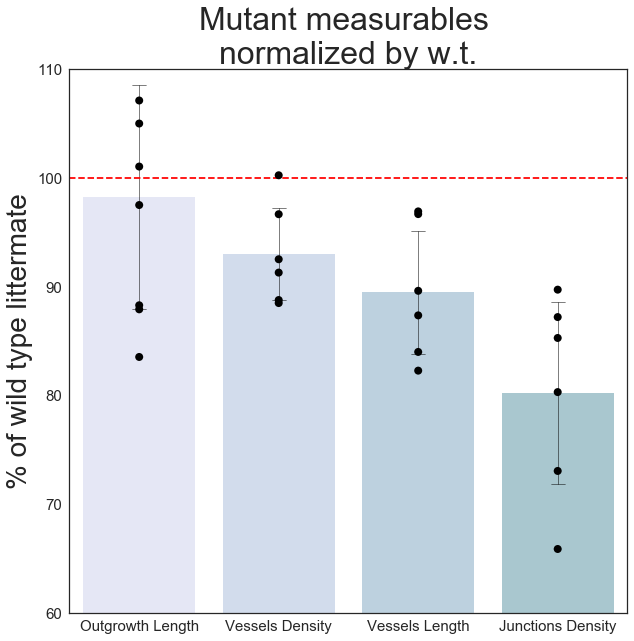

In [144]:
make_bar_and_strip_plot(mutant_df,
                        title = 'Mutant measurables \nnormalized by w.t.'
                       )
plt.savefig('../plots/mutant_bar_plot.png', dpi=1000)

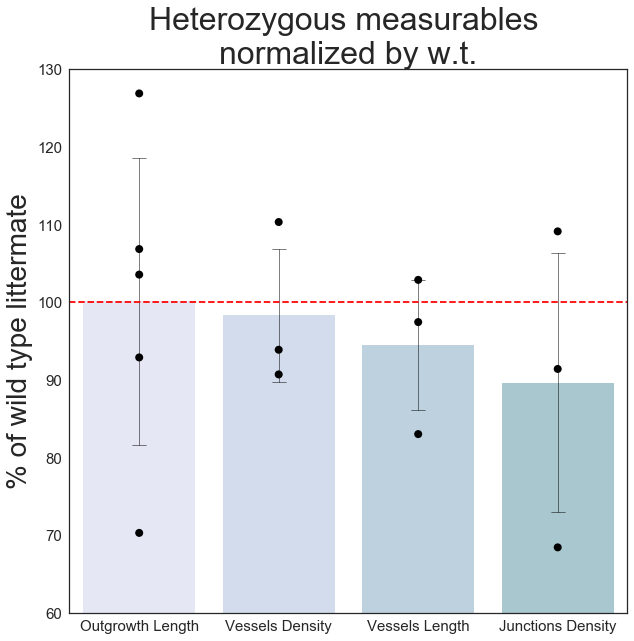

In [145]:
make_bar_and_strip_plot(hetero_df,
                        title = 'Heterozygous measurables \nnormalized by w.t.',
                        ylim = [60,130]
                       )
plt.savefig('../plots/hetero_bar_plot.png', dpi=1000)